# T2 vs concentration
Using the decreasing echo heights to measure the change in T2 with concentration of glycerin

In [104]:
from matplotlib import pyplot as plt
import scipy as sc
import pandas as pd
import numpy as np
from pathlib import Path
from scipy.optimize import curve_fit

#absolute path of repo root
rel_path = Path("/home/ben/Documents/Repos/382L_NMRLab/data/Feb 07/")

T2s = []

In [105]:
def get_peaks(fname, avg_start, avg_end, cutoff_start, cutoff_end, height = None, width = None, prominence = None, distance = None):

    FIDData = pd.read_csv(rel_path / fname, header = None)

    chan1 = FIDData[1].values
    chan2 = FIDData[2].values
    tlist = FIDData[0].values

    avg_window = slice(avg_start, avg_end)
    cutoff_window = slice(cutoff_start, cutoff_end)

    plt.plot(tlist, chan1)
    plt.plot(tlist, chan2)

    plt.axvspan(min(tlist[avg_window]), max(tlist[avg_window]), color = "tab:red", alpha = .5)

    plt.axvspan(min(tlist[cutoff_window]), max(tlist[cutoff_window]), color = "tab:green", alpha = .5)

    plt.show()

    chan1 = np.subtract(chan1, np.mean(chan1[avg_window]))
    chan2 = np.subtract(chan2, np.mean(chan2[avg_window]))

    trans_mag = np.sqrt(np.square(chan1) + np.square(chan2))

    peaks, _ = sc.signal.find_peaks(
        trans_mag[cutoff_window],
    width = width,
    height = height,
        distance = distance,
    )

    peak_times_locs = [(tlist[cutoff_window][peak], trans_mag[cutoff_window][peak]) for peak in peaks]

    stdev = max(trans_mag[avg_window])  - min(trans_mag[avg_window])
    
    plt.plot(tlist,trans_mag, color = "tab:red")
    plt.errorbar([tlist[cutoff_window][peak] for peak in peaks], [trans_mag[cutoff_window][peak] for peak in peaks],yerr = stdev, marker = "o", linestyle = "None")
    plt.show()

    return peak_times_locs

In [106]:
sample_1_peaks = []

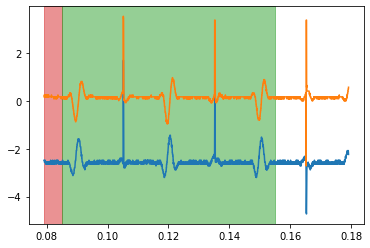

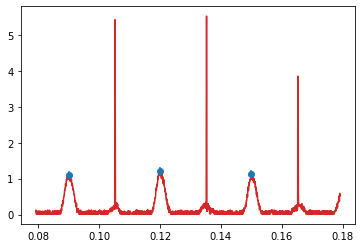

In [94]:
sample_1_peaks = []
sample_1_peaks += get_peaks("C/30_2A.csv", 0, 150, 150, 1900, height = .1, width = 30, distance = 100)

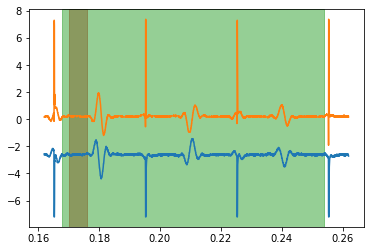

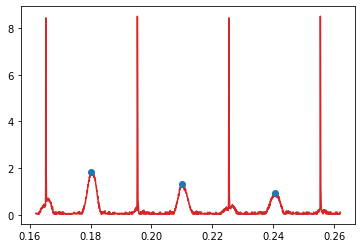

In [107]:
sample_1_peaks += get_peaks("C/30_4A.csv", 200, 350, 150, 2300 , width = 50, distance = 100)

In [100]:
def remove_spikes(data, thresh):
    newdata = data.copy()
    for i in range(len(newdata)-2):
        if abs(newdata[i+1]-newdata[i]) > thresh:
            newdata[i+1] = newdata[i]
    return newdata

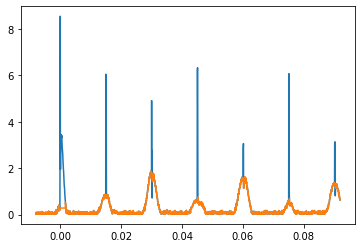

In [101]:
FIDData = pd.read_csv(rel_path / "C/30.csv", header = None)

chan1 = FIDData[1].values
chan2 = FIDData[2].values

avg_start = 0
avg_end = 150

avg_window = slice(avg_start, avg_end)
chan1 = np.subtract(chan1, np.mean(chan1[avg_window]))
chan2 = np.subtract(chan2, np.mean(chan2[avg_window]))

trans_mag = np.sqrt(np.square(chan1) + np.square(chan2))

tlist = FIDData[0].values

plt.plot(tlist, trans_mag)
plt.plot(tlist, remove_spikes(trans_mag,.3))

trans_mag = remove_spikes(trans_mag, .3)

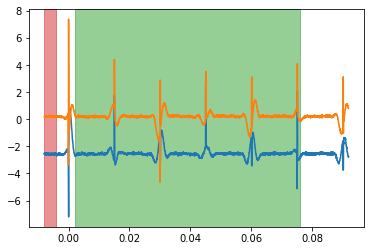

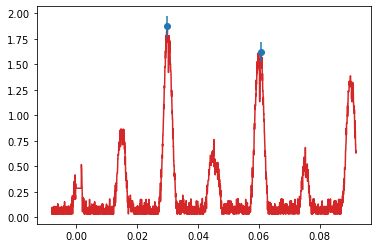

In [102]:
FIDData = pd.read_csv(rel_path / "C/30.csv", header = None)

chan1 = FIDData[1].values
chan2 = FIDData[2].values
tlist = FIDData[0].values

avg_start = 0
avg_end = 100

cutoff_start = 250
cutoff_end = 2100

avg_window = slice(avg_start, avg_end)
cutoff_window = slice(cutoff_start, cutoff_end)

plt.plot(tlist, chan1)
plt.plot(tlist, chan2)

plt.axvspan(min(tlist[avg_window]), max(tlist[avg_window]), color = "tab:red", alpha = .5)

plt.axvspan(min(tlist[cutoff_window]), max(tlist[cutoff_window]), color = "tab:green", alpha = .5)

plt.show()

chan1 = np.subtract(chan1, np.mean(chan1[avg_window]))
chan2 = np.subtract(chan2, np.mean(chan2[avg_window]))

peaks, _ = sc.signal.find_peaks(
    trans_mag[cutoff_window],
height = 1,
    distance = 100,
)

sample_1_peaks += [(tlist[cutoff_window][peak], trans_mag[cutoff_window][peak]) for peak in peaks]

stdev = max(trans_mag[avg_window])  - min(trans_mag[avg_window])

plt.plot(tlist,trans_mag, color = "tab:red")
plt.errorbar([tlist[cutoff_window][peak] for peak in peaks], [trans_mag[cutoff_window][peak] for peak in peaks],yerr = stdev, marker = "o", linestyle = "None")
plt.show()

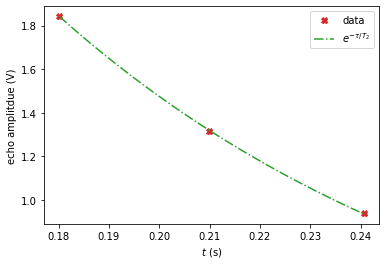

In [112]:
def expfit(t, A, T1):
    return A*np.exp(-t/T1)
times_list, peaks_list = list(zip(*sorted(sample_1_peaks)))

popt, pcov = curve_fit(expfit, times_list, peaks_list, p0 = [10, .02])

plt.plot(times_list, peaks_list, marker = "X", linestyle = "None", color = "tab:red", label = "data")
xlist = np.linspace(min(times_list), max(times_list), 100)
plt.plot(xlist, [expfit(x, *popt) for x in xlist], color = "tab:green", linestyle = "-.", label = r"$e^{-\tau/T_2}$")
plt.legend()
plt.xlabel(r"$t$ (s)")
plt.ylabel("echo amplitdue (V)")

T2s.append(popt[1])

In [113]:
popt[1]

0.08931261326907833